# Preferential attachment

A preferential attachment process is any of a class of processes in which some quantity, typically some form of wealth or credit, is distributed among a number of individuals or objects according to how much they already have, so that those who are already wealthy receive more than those who are not. The principal reason for scientific interest in preferential attachment is that it can, under suitable circumstances, generate power law distributions.

A preferential attachment process is a stochastic urn process, meaning a process in which discrete units of wealth, usually called "balls", are added in a random or partly random fashion to a set of objects or containers, usually called "urns". A preferential attachment process is an urn process in which additional balls are added continuously to the system and are distributed among the urns as an increasing function of the number of balls the urns already have. 

An animated example of how the new nodes are introduced into the network is given at: http://rocs.hu-berlin.de/interactive/pa/index.html

> As the simulation evolves, you will see that a few nodes become larger and larger as the size of the nodes is proportional to the node’s degree (the number of links it has). Note also that the age of the nodes (time since birth) is quantified by their darkness. You can see that all the highly connected nodes are mostly nodes that have been around since the beginning.

A common property of many large networks is that the vertex connectivities follow a scale-free power-law distribution. This feature is found to be a consequence of the two generic mechanisms that networks expand continuously by the addition of new vertices, and new vertices attach preferentially to already well connected sites.  A model based on these two ingredients reproduces the observed stationary scale-free distributions, indicating that the development of large networks is governed by robust self-organizing phenomena that go beyond the particulars of the individual systems.

The preferential attachment process generates a "long-tailed" distribution following a Pareto distribution or power law in its tail. This is the primary reason for the historical interest in preferential attachment: the species distribution and many other phenomena are observed empirically to follow power laws and the preferential attachment process is a leading candidate mechanism to explain this behavior. Preferential attachment is considered a possible candidate for, among other things, the distribution of the sizes of cities, the wealth of extremely wealthy individuals, the number of citations received by learned publications, and the number of links to pages on the World Wide Web.

## Exercise

Explore the preferential attachment rule in the network below. Observe if the preferential attachment rule depends on the number of nodes or the number of new connections per added node. How robust is the rule? Is fractal scaling robust using the preferential attachment rule

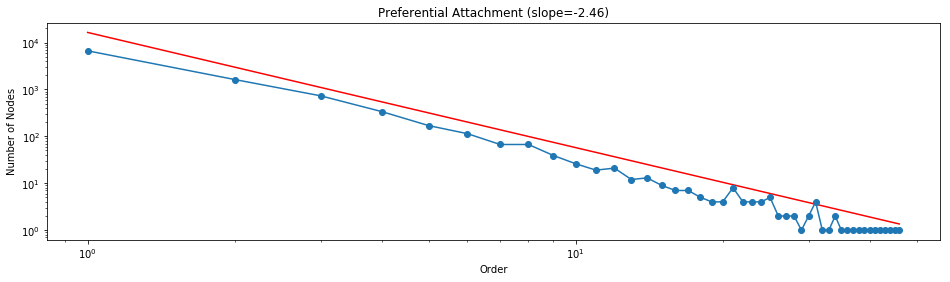

In [27]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

dNetwork = {}       # dictionary of lists
N = 10000       # total number of nodes
m = 1        # number of connections of new nodes introduced to the network

G = nx.barabasi_albert_graph(N,m)


fit_range=[m-1,50]
# Calculate the degree distribution and the logarithmic regression
lDegrees   = [len(G.neighbors(node)) for node in G.nodes()]
ocurrences = [lDegrees.count(i) for i in range(0, np.max(lDegrees))]
indexes_null = np.where([i==0 for i in ocurrences])
ocurrences = np.delete(ocurrences, indexes_null)
order = np.arange(1,1+len(ocurrences))
P = np.polyfit(np.log(order[fit_range[0]:fit_range[1]]),np.log(ocurrences[fit_range[0]:fit_range[1]]), 1)

# Plot figure
plt.figure(figsize=(16, 4), dpi=72)
plt.xlabel("Order")
plt.ylabel("Number of Nodes")
plt.title("Preferential Attachment (slope=%.2f)" % (P[0]))
plt.loglog(order[fit_range[0]:fit_range[1]],np.power(order[fit_range[0]:fit_range[1]], P[0])*np.exp(P[1])*2, 'r')
plt.loglog(order, ocurrences, 'o-');
plt.show()

# References
- Barabási, Albert-László, and Réka Albert. ["Emergence of scaling in random networks."](https://arxiv.org/pdf/cond-mat/9910332.pdf%3Forigin%3Dpublication_detail) science 286.5439 (1999): 509-512.
- Wikipedia. ["Preferential attachment."](https://en.wikipedia.org/wiki/Preferential_attachment)